In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from textblob import TextBlob
import nltk
nltk.download('punkt')  # Needed for TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
ticker = "AAPL"
stock_data = yf.download(ticker, start="2011-01-01", end="2012-12-31")  # adjust this range as needed
stock_data.reset_index(inplace=True)
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2011-01-03,9.904959,9.925696,9.762803,9.786846,445138400
1,2011-01-04,9.956651,9.993016,9.862280,9.991213,309080800
2,2011-01-05,10.038098,10.048317,9.902855,9.904358,255519600
3,2011-01-06,10.029985,10.075667,10.005040,10.059739,300428800
4,2011-01-07,10.101811,10.108724,9.974982,10.037796,311931200


In [45]:
news_df = pd.read_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\sentiment_by_stock_date.csv")
print(news_df.columns.tolist())


['date                     ', ' stock', ' polarity']


In [46]:
news_df = pd.read_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\sentiment_by_stock_date.csv")

news_df.columns = news_df.columns.str.strip()
news_df['date'] = pd.to_datetime(news_df['date'], errors="coerce").dt.date

print(news_df.head())


         date   stock  polarity
0  2011-04-27   DGP    0.000000
1  2011-04-28   ESR    0.136364
2  2011-04-28   DEJ    0.000000
3  2011-04-29   AIA   -0.166667
4  2011-04-29   GDL    0.500000


In [47]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['sentiment'] = news_df['stock'].astype(str).apply(get_sentiment)
news_df.head()


,date,stock,polarity,sentiment
0,2011-04-27,DGP,0.000000,0.0
1,2011-04-28,ESR,0.136364,0.0
2,2011-04-28,DEJ,0.000000,0.0
3,2011-04-29,AIA,-0.166667,0.0
4,2011-04-29,GDL,0.500000,0.0


In [48]:
# Average sentiment per day
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)
daily_sentiment.head()


,date,avg_sentiment
0,2011-04-27,0.0
1,2011-04-28,0.0
2,2011-04-29,0.0
3,2011-04-30,0.0
4,2011-05-01,0.0


In [49]:
print(stock_data.columns)


MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [50]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

stock_data['date'] = stock_data['Date'].dt.date
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Calculate daily return using the correct MultiIndex reference
stock_data[('daily_return', '')] = stock_data[('Close', 'AAPL')].pct_change()
stock_data = stock_data.dropna(subset=[('daily_return', '')])

stock_data.head()


Price,Date,Close,High,Low,Open,Volume,date,daily_return
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
1,2011-01-04,9.956651,9.993016,9.862280,9.991213,309080800,2011-01-04,0.005219
2,2011-01-05,10.038098,10.048317,9.902855,9.904358,255519600,2011-01-05,0.008180
3,2011-01-06,10.029985,10.075667,10.005040,10.059739,300428800,2011-01-06,-0.000808
4,2011-01-07,10.101811,10.108724,9.974982,10.037796,311931200,2011-01-07,0.007161
5,2011-01-10,10.292055,10.315497,10.133369,10.183259,448560000,2011-01-10,0.018833


In [51]:
print(daily_sentiment.columns)

Index(['date', 'avg_sentiment'], dtype='object')


In [52]:
# Flatten the MultiIndex columns in stock_data
stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]


stock_data.rename(columns={'date_': 'date'}, inplace=True)

print(stock_data.columns) 


Index(['Date_', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'date', 'daily_return_'],
      dtype='object')


In [53]:

# Ensure both are in datetime.date format
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce').dt.date
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'], errors='coerce').dt.date


In [54]:
print(stock_data['date'].dtype)
print(daily_sentiment['date'].dtype)


object
object


In [56]:
# Check unique values
stock_dates = set(stock_data['date'].dropna().unique())
sentiment_dates = set(daily_sentiment['date'].dropna().unique())

# Intersect
common_dates = stock_dates.intersection(sentiment_dates)
print(f"Number of common dates: {len(common_dates)}")

# Optionally see a few of them
print(sorted(list(common_dates))[:10])


Number of common dates: 390
[datetime.date(2011, 4, 27), datetime.date(2011, 4, 28), datetime.date(2011, 4, 29), datetime.date(2011, 5, 2), datetime.date(2011, 5, 3), datetime.date(2011, 5, 5), datetime.date(2011, 5, 6), datetime.date(2011, 5, 9), datetime.date(2011, 5, 11), datetime.date(2011, 5, 12)]


In [59]:
merged_df = pd.merge(stock_data, daily_sentiment, on='date', how='inner')
print(merged_df.head())
print(f"Rows after merge: {len(merged_df)}")


       Date_  Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL  \
0 2011-04-27   10.523476  10.589596  10.431811  10.586289    356213200   
1 2011-04-28   10.421290  10.511452  10.384323  10.404460    360959200   
2 2011-04-29   10.522873  10.637679  10.418885  10.422191   1006345200   
3 2011-05-02   10.407163  10.533090  10.383721  10.511150    442713600   
4 2011-05-03   10.464866  10.515657  10.387326  10.458555    313348000   

         date  daily_return_  avg_sentiment  
0  2011-04-27      -0.000770            0.0  
1  2011-04-28      -0.009710            0.0  
2  2011-04-29       0.009748            0.0  
3  2011-05-02      -0.010996            0.0  
4  2011-05-03       0.005545            0.0  
Rows after merge: 390


In [60]:
# Pearson correlation between sentiment and daily returns
correlation = merged_df['avg_sentiment'].corr(merged_df['daily_return_'])
print(f"Pearson Correlation between Sentiment and Stock Return: {correlation:.4f}")


Pearson Correlation between Sentiment and Stock Return: -0.0106


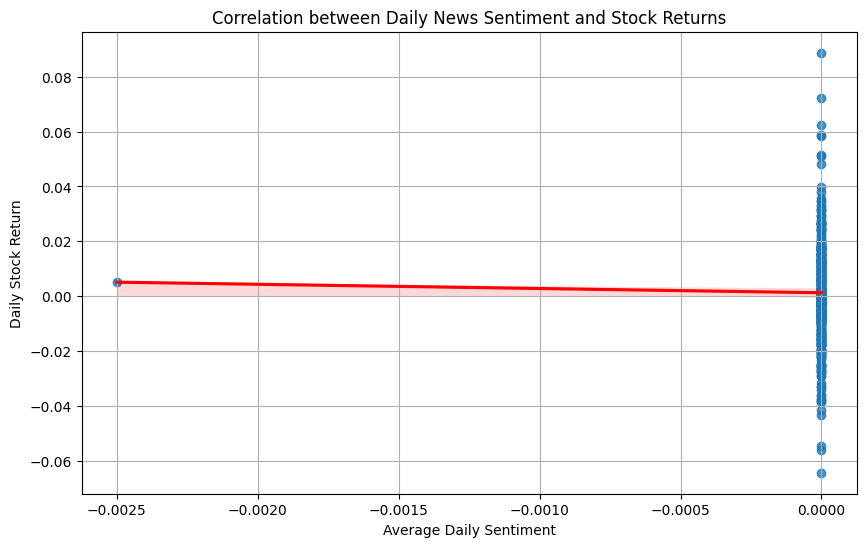

In [61]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='avg_sentiment', y='daily_return_', line_kws={"color": "red"})
plt.title("Correlation between Daily News Sentiment and Stock Returns")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.grid(True)
plt.show()


In [63]:
merged_df.to_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data/merged_sentiment_stock.csv", index=False)
